## Getting tensorboard data

In [2]:
import tensorflow as tf
import tensorboard as tb
import tensorboard.backend.event_processing as ep
import tensorboard.backend.event_processing.event_file_loader as efl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [164]:
import os

In [379]:
# default figure size is [6.0, 4.0]
plt.rcParams['figure.figsize'] = [5, 3.33]
# default dpi is 72
plt.rcParams['figure.dpi'] = 144

In [4]:
# loader = efl.EventFileLoader('../../data/2021-03/20210306-223124/Mar06_22-31-24_m20.hpcc.dartmouth.edu/events.out.tfevents.1615087884.m20.hpcc.dartmouth.edu.26520.0')

In [429]:
directory = '../../data/2021-04/20210424-no-errors/20210425-202748/'

In [430]:
events_file = [f for f in os.listdir(directory) if 'events.out.tfevents' in f][0]
loader = efl.EventFileLoader(os.path.join(directory, events_file))

In [431]:
events = []
for event in loader.Load():
    events.append(event)

# get histogram events
hist_events = [a for a in events if 'hist' in str(a)]
# get steps, bucket limits, and buckets
steps, buckets, bucket_limits = zip(*[
    (a.step, a.summary.value[0].histo.bucket, a.summary.value[0].histo.bucket_limit)
    for a in hist_events
])

Because tensorboard makes non-uniform bin widths, there are weird artifacts when plotting a histogram with lots of bins. When the data is binned with large width, most of the data will be plotted into a very narrow bin, with blank space on either side (even though this isn't actually true).

In [432]:
densities = []
for bl, b in zip(bucket_limits, buckets):
    counts, _ = np.histogram(bl, bins=np.linspace(-1, 10, 15), weights=b)
    densities.append(counts / counts.sum())
densities = np.stack(densities)

In [433]:
densities.shape

(90, 14)

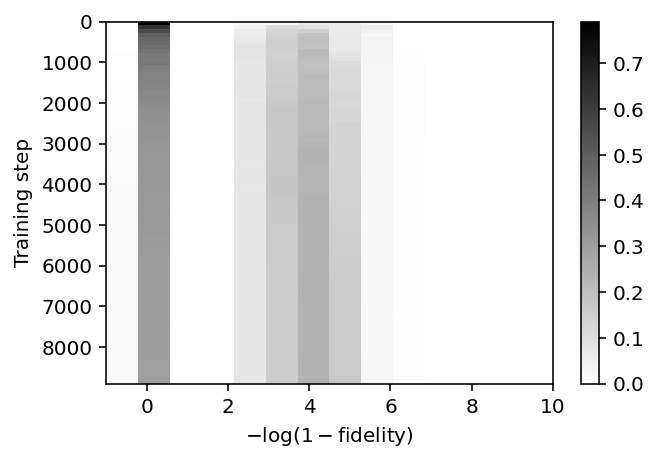

In [434]:
plt.imshow(densities, aspect='auto', cmap=plt.cm.binary,
           extent=[-1, 10, steps[-1], steps[0]], interpolation='nearest')
plt.colorbar()
plt.xlabel(r'$-\log(1-$fidelity$)$')
plt.ylabel('Training step')
plt.savefig(os.path.join(directory, 'reward_hist.pdf'), bbox_inches='tight')

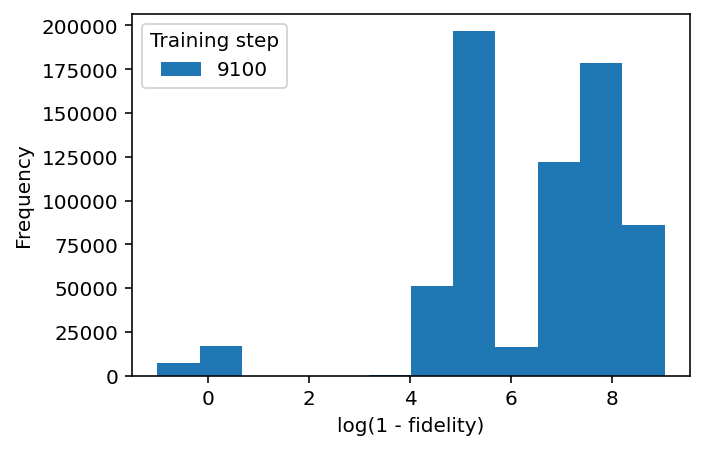

In [282]:
plt.hist(bucket_limits[-1], bins=12, weights=buckets[-1],
         #range=(-1, 7), alpha=0.5,
         density=False, label=str(steps[-1]))
plt.legend(title='Training step')
plt.xlabel('log(1 - fidelity)')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.show()
# plt.savefig(os.path.join(directory, 'hist.pdf'), bbox_inches='tight')

In [201]:
# for i in [100, 200]:
#     plt.hist(bucket_limits[i], bins=20, weights=buckets[i], range=(-1, 7),
#              density=True, alpha=0.5, label=str(steps[i]))
# plt.legend(title='Training step')
# plt.xlabel('log(1 - fidelity)')
# plt.ylabel('Frequency')
# plt.show()

## Save histogram data to csv

In [152]:
mean_rewards = []
for i in range(len(buckets)):
    mean_rewards.append((np.array(bucket_limits[i])
                        * np.array(buckets[i])).sum()
                       / np.array(buckets[i]).sum())

In [153]:
mean_rewards = np.array(mean_rewards)

In [154]:
np.savetxt(directory + '10.csv', mean_rewards, delimiter=',')

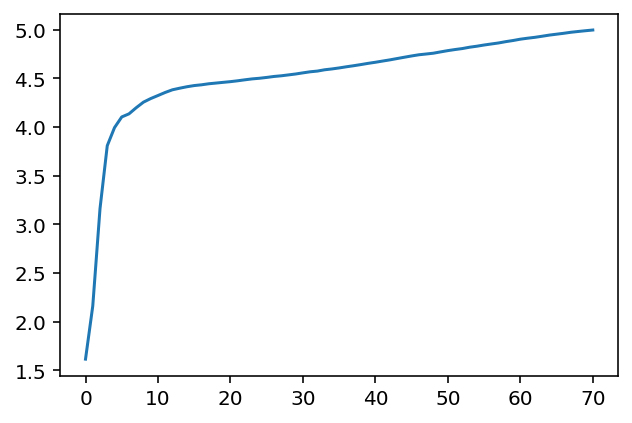

In [155]:
plt.plot(mean_rewards)

7.466637793298873

In [161]:
max_rewards = []
for i in range(len(buckets)):
    max_rewards.append((np.array(bucket_limits[i])
                        * (np.array(buckets[i]) > 0)).max())

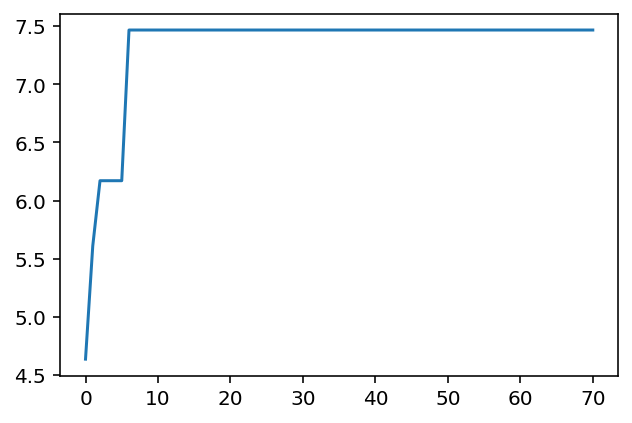

In [162]:
plt.plot(max_rewards)

## Make consistency plots

In [167]:
directory = '../../data/2021-04/20210414-consistency/mean_rewards/'

In [170]:
data = []
for f in os.listdir(directory):
    print(os.path.join(directory, f))
    data.append(np.loadtxt(os.path.join(directory, f)))

../../data/2021-04/20210414-consistency/mean_rewards/08.csv
../../data/2021-04/20210414-consistency/mean_rewards/09.csv
../../data/2021-04/20210414-consistency/mean_rewards/02.csv
../../data/2021-04/20210414-consistency/mean_rewards/03.csv
../../data/2021-04/20210414-consistency/mean_rewards/01.csv
../../data/2021-04/20210414-consistency/mean_rewards/04.csv
../../data/2021-04/20210414-consistency/mean_rewards/10.csv
../../data/2021-04/20210414-consistency/mean_rewards/05.csv
../../data/2021-04/20210414-consistency/mean_rewards/07.csv
../../data/2021-04/20210414-consistency/mean_rewards/06.csv


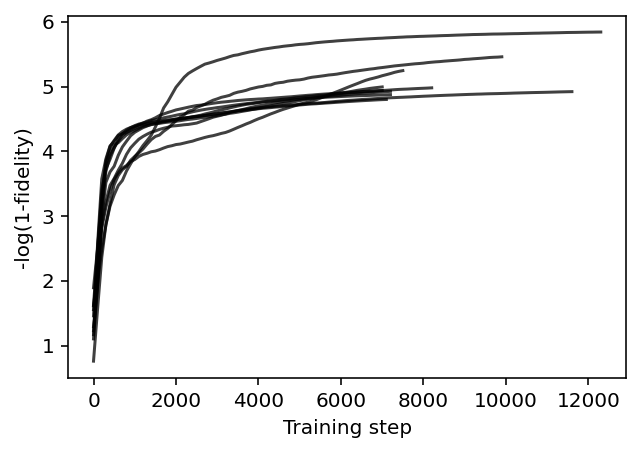

In [188]:
for d in data:
    x = np.arange(d.size) * 100
    plt.plot(x, d, color='k', alpha=.75)
plt.xlabel('Training step')
plt.ylabel('-log(1-fidelity)')
plt.savefig(os.path.join(directory, 'hist.pdf'), bbox_inches='tight')

## Make movie

on 0...
on 10...
on 20...
on 30...
on 40...
on 50...
on 60...
on 70...
on 80...
on 90...
on 100...
on 110...
on 120...
on 130...
on 140...
on 150...
on 160...
on 170...
on 180...
on 190...
on 200...
on 210...
on 220...
on 230...
on 240...
on 250...
on 260...
on 270...
on 280...
on 290...
on 300...
on 310...
on 320...
on 330...
on 340...
on 350...
on 360...
on 370...
on 380...
on 390...
on 400...
on 410...
on 420...
on 430...
on 440...
on 450...
on 460...
on 470...
on 480...
on 490...
on 500...
on 510...
on 520...
on 530...
on 540...
on 550...
on 560...
on 570...
on 580...
on 590...
on 600...
on 610...
on 620...
on 630...
on 640...
on 650...
on 660...
on 670...
on 680...
on 690...
on 700...
on 710...
on 720...


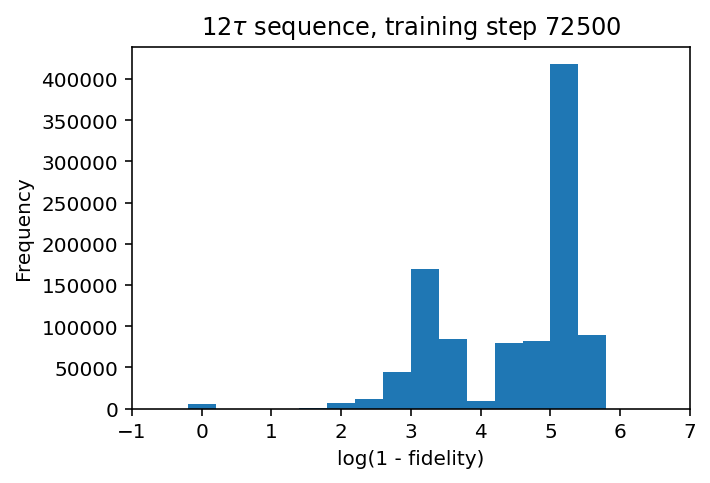

In [10]:
for j in range(int(731/5)):
    i = j * 5
    if i % 10 == 0:
        print(f'on {i}...')
    plt.clf()
    plt.xlim(-1, 7)
    # plt.ylim(0, 1.25)
    plt.hist(bucket_limits[i], bins=20, weights=buckets[i], range=(-1, 7),
             density=False,
             # alpha=0.5, label=str(steps[i])
            )
    # plt.legend(title='Training step')
    plt.xlabel('log(1 - fidelity)')
    plt.ylabel('Frequency')
    plt.title(fr'12$\tau$ sequence, training step {steps[i]}')
    plt.savefig(f'hist-{j:04.0f}.png', bbox_inches='tight')

Then once this is done, 

- `mogrify -format png -gravity south -chop 0x1 hist*.png` to make height even pixel count
- `ffmpeg -framerate 16 -i hist-%05d.png -r 30 -pix_fmt yuv420p _output.mp4` to compile into video